In [1]:
import numpy as np
from PIL import Image
import glob
import re
from statistics import mean, median

In [2]:
IMGS_DIR = "character_imgs/ascii/CascadiaMono/"

In [3]:
img = Image.open(IMGS_DIR + "100.bmp")
img_arr = np.array(img)

img_size = img_arr.size
img_shape = img_arr.shape

print(img_size, img_shape)

img

190 (19, 10)


In [4]:
img_ls = glob.glob(IMGS_DIR + "*.bmp")
for i in range(0, len(img_ls)):
    img = Image.open(img_ls[i])
    img = np.array(img)
    char = chr(int(re.findall(r'\d+', img_ls[i])[0]))
    img_ls[i] = (img_ls[i], (img > 0).sum() / img.size, char)

img_ls

[('character_imgs/ascii/CascadiaMono\\100.bmp', 0.37894736842105264, 'd'),
 ('character_imgs/ascii/CascadiaMono\\101.bmp', 0.2789473684210526, 'e'),
 ('character_imgs/ascii/CascadiaMono\\102.bmp', 0.24210526315789474, 'f'),
 ('character_imgs/ascii/CascadiaMono\\103.bmp', 0.4052631578947368, 'g'),
 ('character_imgs/ascii/CascadiaMono\\104.bmp', 0.2789473684210526, 'h'),
 ('character_imgs/ascii/CascadiaMono\\105.bmp', 0.2578947368421053, 'i'),
 ('character_imgs/ascii/CascadiaMono\\106.bmp', 0.24736842105263157, 'j'),
 ('character_imgs/ascii/CascadiaMono\\107.bmp', 0.2736842105263158, 'k'),
 ('character_imgs/ascii/CascadiaMono\\108.bmp', 0.20526315789473684, 'l'),
 ('character_imgs/ascii/CascadiaMono\\109.bmp', 0.37894736842105264, 'm'),
 ('character_imgs/ascii/CascadiaMono\\110.bmp', 0.23684210526315788, 'n'),
 ('character_imgs/ascii/CascadiaMono\\111.bmp', 0.25263157894736843, 'o'),
 ('character_imgs/ascii/CascadiaMono\\112.bmp', 0.3263157894736842, 'p'),
 ('character_imgs/ascii/Cascadi

In [5]:
img_ls.sort(key=lambda a: a[1])

img_ls

[('character_imgs/ascii/CascadiaMono\\32.bmp', 0.0, ' '),
 ('character_imgs/ascii/CascadiaMono\\46.bmp', 0.042105263157894736, '.'),
 ('character_imgs/ascii/CascadiaMono\\39.bmp', 0.07894736842105263, "'"),
 ('character_imgs/ascii/CascadiaMono\\96.bmp', 0.07894736842105263, '`'),
 ('character_imgs/ascii/CascadiaMono\\44.bmp', 0.08421052631578947, ','),
 ('character_imgs/ascii/CascadiaMono\\58.bmp', 0.08421052631578947, ':'),
 ('character_imgs/ascii/CascadiaMono\\45.bmp', 0.09473684210526316, '-'),
 ('character_imgs/ascii/CascadiaMono\\95.bmp', 0.09473684210526316, '_'),
 ('character_imgs/ascii/CascadiaMono\\59.bmp', 0.12631578947368421, ';'),
 ('character_imgs/ascii/CascadiaMono\\34.bmp', 0.1368421052631579, '"'),
 ('character_imgs/ascii/CascadiaMono\\94.bmp', 0.1368421052631579, '^'),
 ('character_imgs/ascii/CascadiaMono\\126.bmp', 0.15789473684210525, '~'),
 ('character_imgs/ascii/CascadiaMono\\33.bmp', 0.1631578947368421, '!'),
 ('character_imgs/ascii/CascadiaMono\\76.bmp', 0.178947

In [6]:
img_ls[0], img_ls[0][1] / img_size

(('character_imgs/ascii/CascadiaMono\\32.bmp', 0.0, ' '), 0.0)

In [7]:
median([a[1] for a in img_ls])

0.2789473684210526

In [8]:
mean([a[1] for a in img_ls])

0.2749030470914127

In [9]:
img_ls[-1], img_ls[-1][1] / img_size

(('character_imgs/ascii/CascadiaMono\\64.bmp', 0.5421052631578948, '@'),
 0.002853185595567867)

In [10]:
brightness_str = ""
for img in img_ls:
    brightness_str += img[2]

brightness_str

' .\'`,:-_;"^~!L=l+>1cv<nu/?Tfrz\\jx(ois|7FYkt*ehCIJ)4PZ{E2[]}b3VXaKSUAHpywDR659BqO#GMdm&N%$8g0WQ@'

In [11]:
fills = [a[1] for a in img_ls]

In [12]:
import matplotlib.pyplot as plt

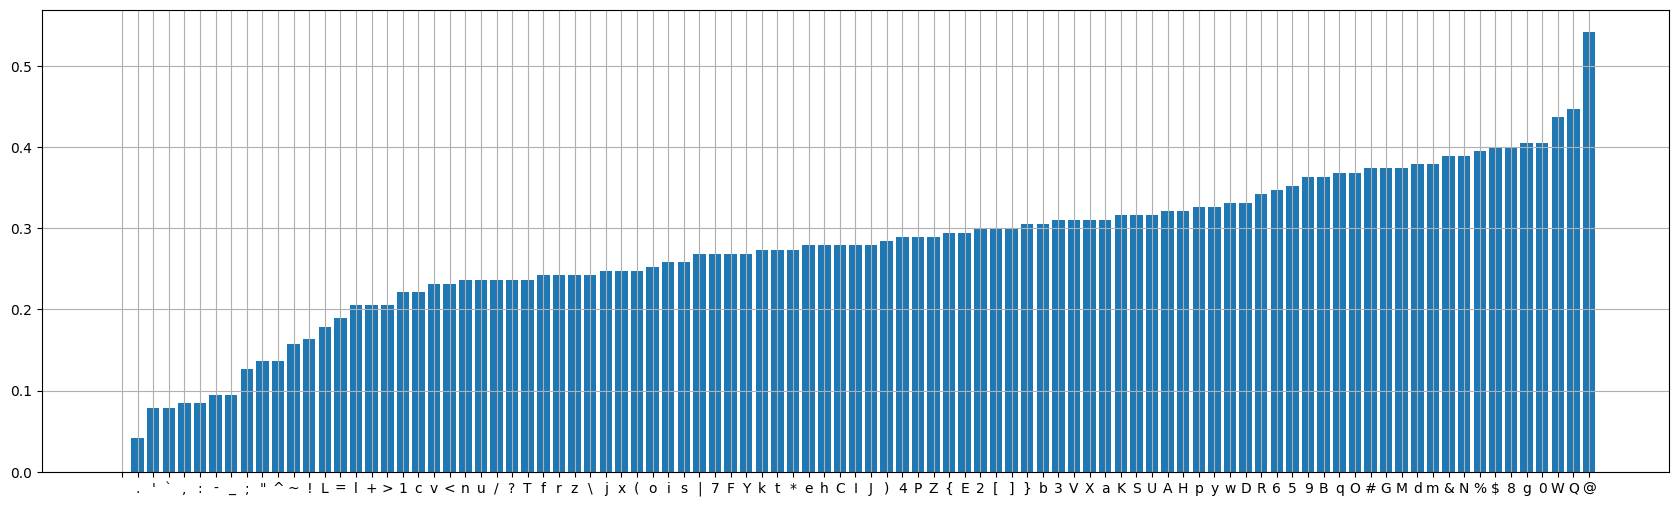

In [13]:
plt.figure(figsize=(21, 6))
plt.bar(list(brightness_str), fills)
plt.grid()

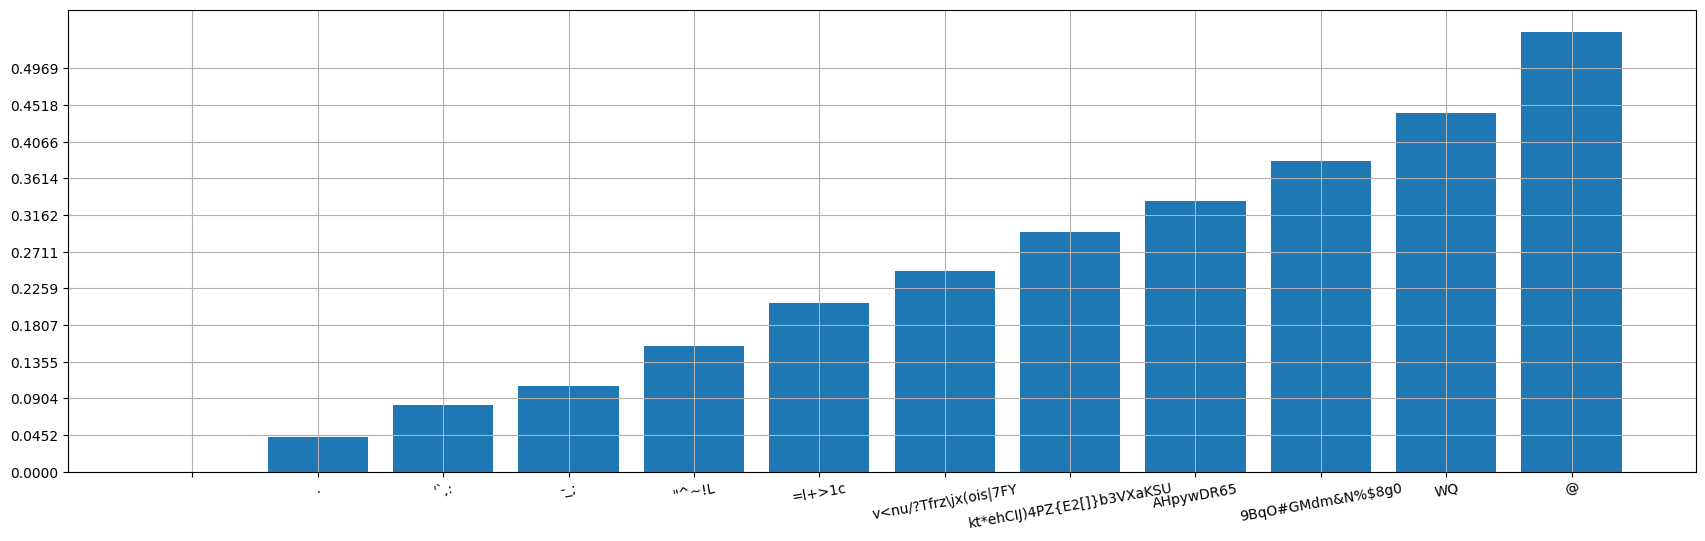

In [14]:
palette = [""]
palette_fills = []

f = 0
f_step = img_ls[-1][1] / 12
avg = 0
for a in img_ls:
    if a[1] > f:
        palette_fills.append(avg/len(palette[-1]))
        palette.append("")
        avg = 0
        f += f_step
    
    palette[-1] += a[2]
    avg += a[1]

palette_fills.append(avg/len(palette[-1]))

plt.figure(figsize=(21, 6))
plt.yticks(np.arange(0, img_ls[-1][1], f_step))
plt.xticks(rotation=10)
plt.bar(palette, palette_fills)
plt.grid()

In [15]:
palette = [' ', '.', ':', ';', '!', '+', 'o', '4', 'D', 'N', 'Q', '@']

palette_fills = []
for a in img_ls:
    if a[2] in palette:
        palette_fills.append(a[1])


In [16]:
for p in zip(palette, palette_fills):
    print(p)

(' ', 0.0)
('.', 0.042105263157894736)
(':', 0.08421052631578947)
(';', 0.12631578947368421)
('!', 0.1631578947368421)
('+', 0.20526315789473684)
('o', 0.25263157894736843)
('4', 0.2894736842105263)
('D', 0.33157894736842103)
('N', 0.3894736842105263)
('Q', 0.4473684210526316)
('@', 0.5421052631578948)


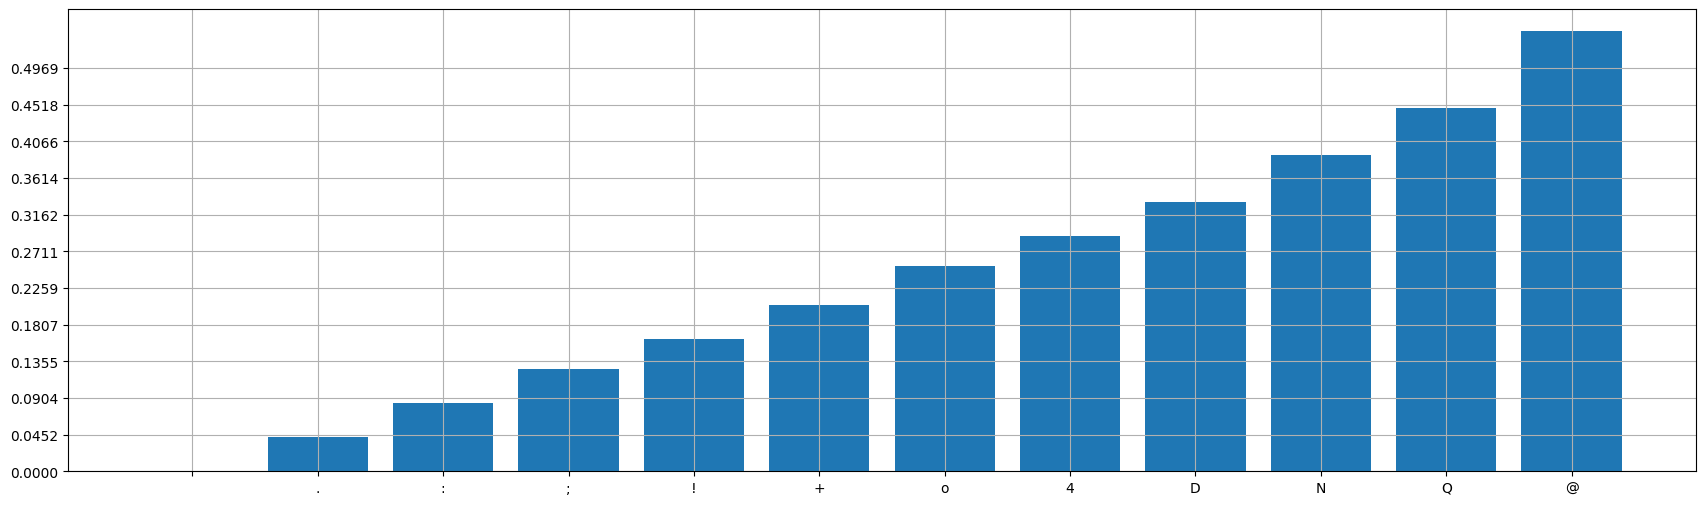

In [17]:
plt.figure(figsize=(21, 6))
plt.yticks(np.arange(0, img_ls[-1][1], f_step))
plt.bar(palette, palette_fills)
plt.grid()

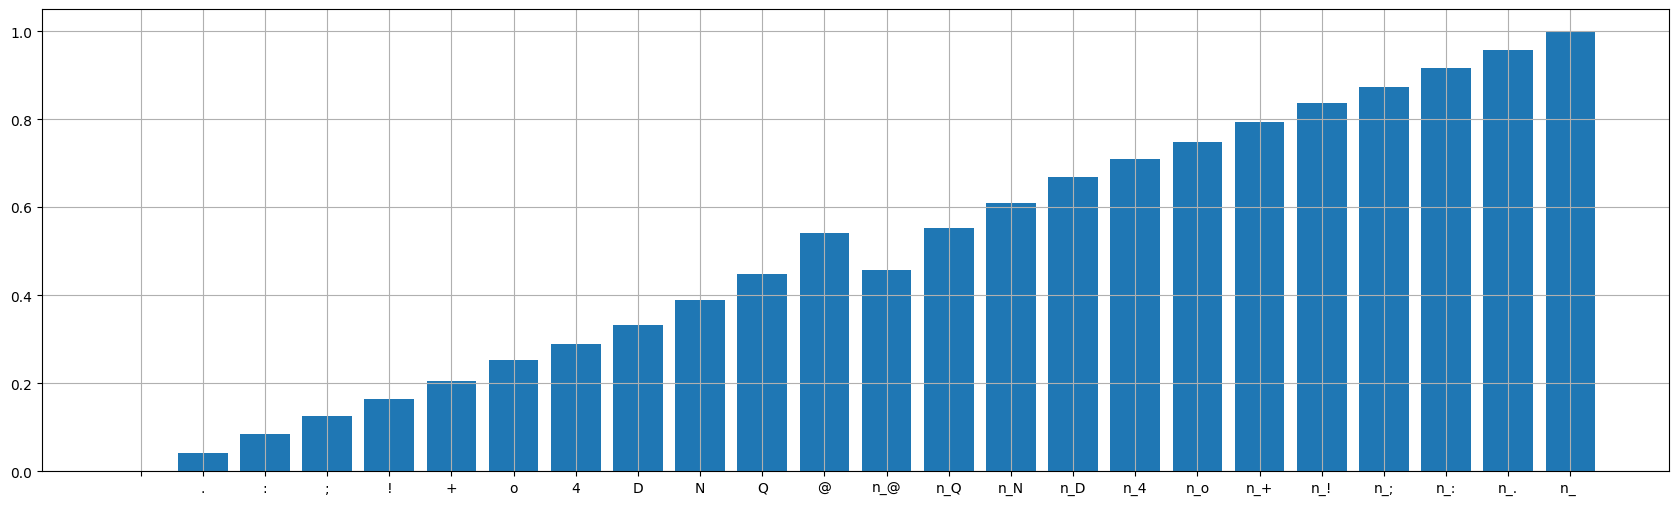

In [18]:
palette_with_neg = palette + list(map(lambda a: "n_" + a, reversed(palette)))
palette_fills_with_neg = palette_fills + list(map(lambda a: 1 - a, reversed(palette_fills)))

plt.figure(figsize=(21, 6))
plt.bar(palette_with_neg, palette_fills_with_neg)
plt.grid()